### Importing Required Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
data=pd.read_csv(r"C:\Users\Nikita Kadam\Desktop\Prpject Dataset\online_shoppers_intention (1).csv")

In [3]:
data.shape

(12330, 18)

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Class
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

#### Converting Non-numeric data into Numeric Data

In [7]:
data.columns[data.dtypes=='object']

Index(['Month', 'VisitorType'], dtype='object')

In [8]:
data.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
data.Month=data.Month.replace({'May':5,'Nov':11,'Mar':3,'Dec':12,'Oct':10,'Sep':9,'Aug':8,'Jul':7,'June':6,'Feb':2})

data.VisitorType=data.VisitorType.replace({'Returning_Visitor':0,'New_Visitor':1,'Other':2})

In [10]:
data.Weekend = le.fit_transform(data.Weekend)
data.Class = le.fit_transform(data.Class)

In [11]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Class
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [12]:
import warnings 
warnings.filterwarnings("ignore")

### Data Visualization

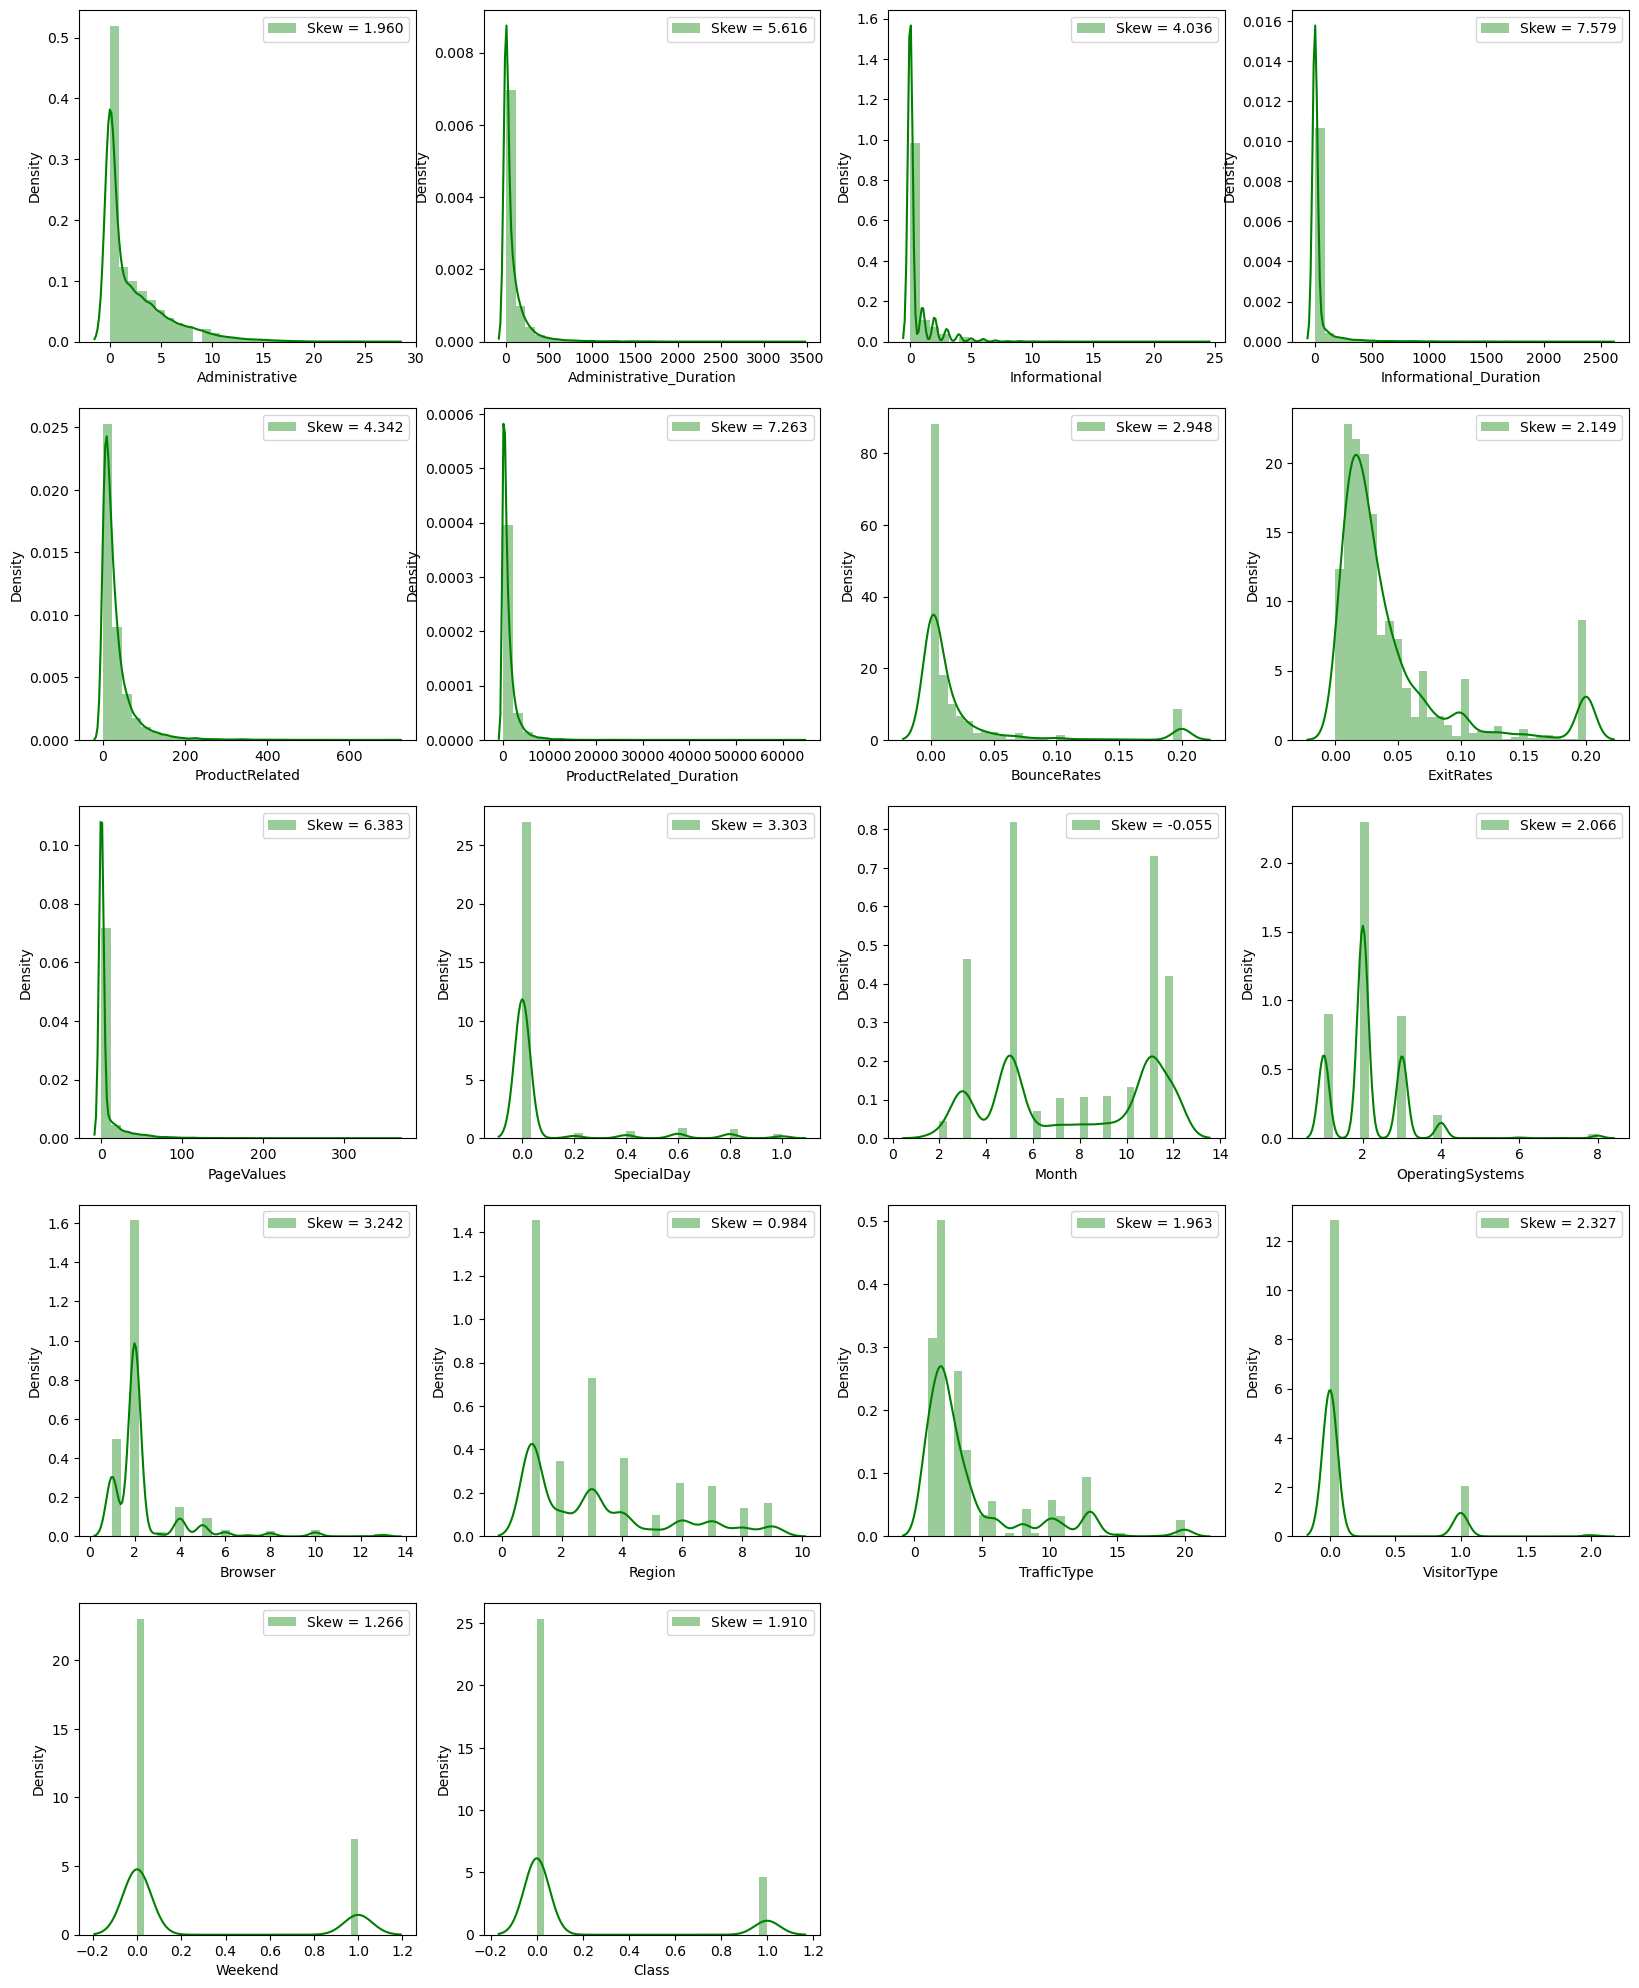

In [13]:
a=[cols for cols in data.columns if data[cols].dtypes != 'O']
plotnumber = 1
plt.figure(figsize=(20,25))
for i in a:
    if plotnumber<= 19:
        ax = plt.subplot(5,4,plotnumber)
        skew = data[i].skew()
        sns.distplot(data[i], kde= True, label='Skew = %.3f' %(skew), bins=30,color='green')
        plt.legend(loc='best')
    plotnumber+=1
plt.show();

### Correlation

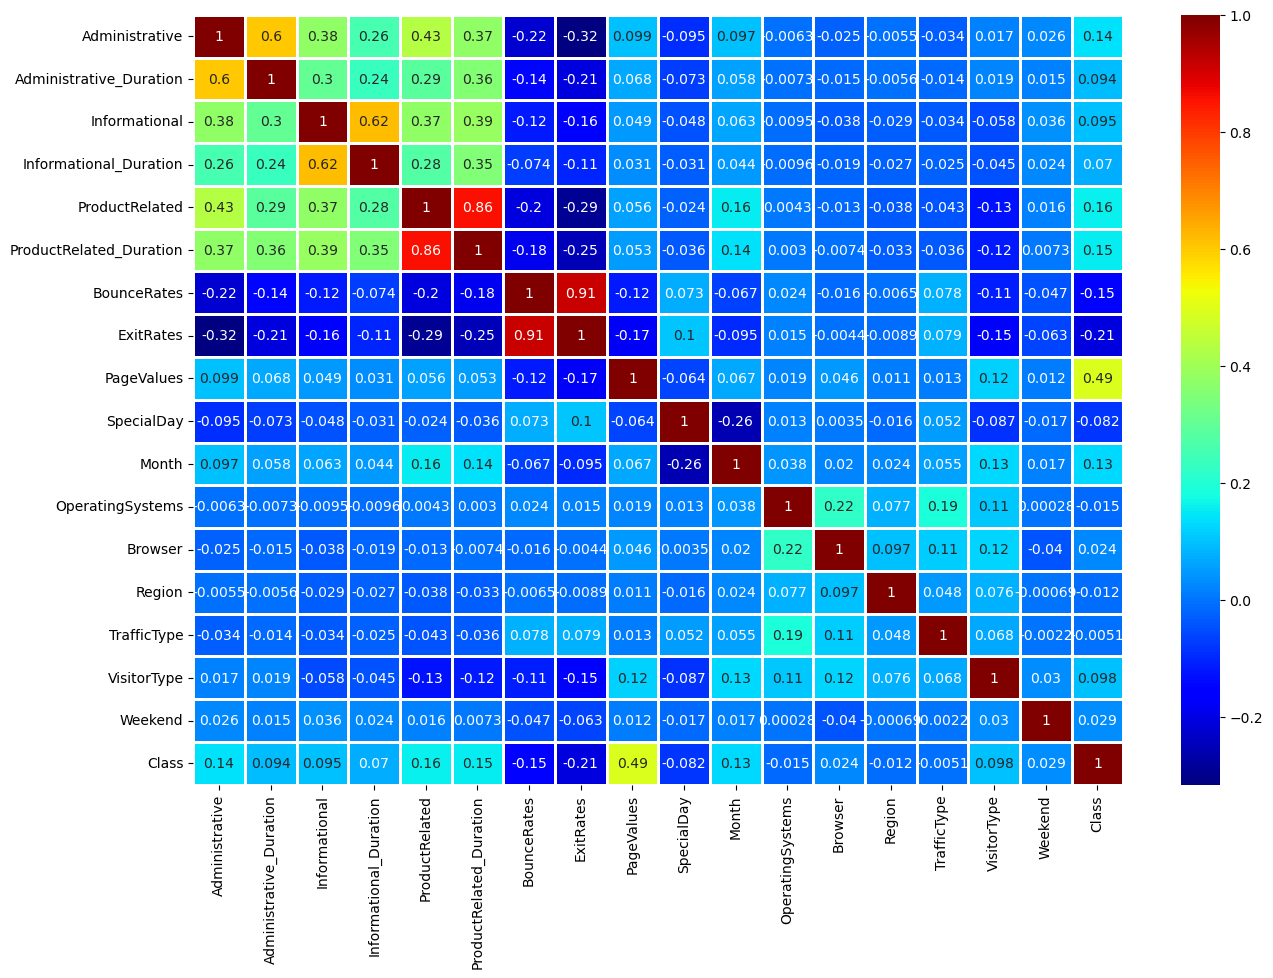

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white');

In [15]:
data_x = data.iloc[:, 0:-1]
data_y = data.iloc[:, 1]

#### Scaling-Data with StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
data_x = pd.DataFrame(scaler.fit_transform(data_x),columns= data_x.columns)

In [18]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size = .2)

In [19]:
train_x = train.iloc[:, 0:-1]
train_y = train.iloc[:, -1]

test_x = test.iloc[:, 0:-1]
test_y = test.iloc[:, -1]

#### SMOTE for Class Imbalance

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE(sampling_strategy = 1)

In [22]:
sm_train_x, sm_train_y  = sm.fit_resample(train_x,train_y)

In [23]:
sm_train_y.value_counts()

0    8352
1    8352
Name: Class, dtype: int64

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [25]:
logreg.fit(sm_train_x,sm_train_y)

LogisticRegression()

In [26]:
pred_log = logreg.predict(test_x)
pred_log

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

In [28]:
confusion_matrix(test_y,pred_log)

array([[1846,  224],
       [ 115,  281]], dtype=int64)

In [29]:
accu_log=accuracy_score(test_y,pred_log)
accu_log

0.8625304136253041

In [30]:
recall_log=recall_score(test_y,pred_log)
recall_log

0.7095959595959596

In [31]:
precision_log=precision_score(test_y,pred_log)
precision_log

0.5564356435643565

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

In [33]:
Dt.fit(sm_train_x,sm_train_y)

DecisionTreeClassifier()

In [34]:
pred_Dt= Dt.predict(test_x)
pred_Dt

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [35]:
confusion_matrix(test_y,pred_Dt)

array([[1815,  255],
       [ 143,  253]], dtype=int64)

In [36]:
accu_Dt=accuracy_score(test_y,pred_Dt)
accu_Dt

0.8386050283860503

In [37]:
recall_Dt=recall_score(test_y,pred_Dt)
recall_Dt

0.6388888888888888

In [38]:
precision_Dt=precision_score(test_y,pred_Dt)
precision_Dt

0.49803149606299213

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

In [40]:
rfc.fit(sm_train_x,sm_train_y)

RandomForestClassifier()

In [41]:
pred_rfc=rfc.predict(test_x)

In [42]:
confusion_matrix(test_y,pred_rfc)

array([[1885,  185],
       [ 111,  285]], dtype=int64)

In [43]:
accu_rfc=accuracy_score(test_y,pred_rfc)
accu_rfc

0.8799675587996756

In [44]:
recall_rfc=recall_score(test_y,pred_rfc)
recall_rfc

0.7196969696969697

In [45]:
precision_rfc=precision_score(test_y,pred_rfc)
precision_rfc

0.6063829787234043

### Gradient boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
Gbc=GradientBoostingClassifier()

In [47]:
Gbc.fit(sm_train_x,sm_train_y)

GradientBoostingClassifier()

In [48]:
pred_Gbc = Gbc.predict(test_x)

In [49]:
confusion_matrix(test_y,pred_Gbc)

array([[1872,  198],
       [  98,  298]], dtype=int64)

In [50]:
accu_Gbc=accuracy_score(test_y,pred_Gbc)
accu_Gbc

0.8799675587996756

In [51]:
recall_Gbc=recall_score(test_y,pred_Gbc)
recall_Gbc

0.7525252525252525

In [52]:
precision_Gbc=precision_score(test_y,pred_Gbc)
precision_Gbc

0.6008064516129032

### XGB Boost

In [53]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [54]:
xgb.fit(sm_train_x,sm_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
pred_xgb=xgb.predict(test_x)

In [56]:
confusion_matrix(test_y,pred_xgb)

array([[1899,  171],
       [ 128,  268]], dtype=int64)

In [57]:
accu_xgb=accuracy_score(test_y,pred_xgb)
accu_xgb

0.8787510137875101

In [58]:
recall_xgb=recall_score(test_y,pred_xgb)
recall_xgb

0.6767676767676768

In [59]:
precision_xgb=precision_score(test_y,pred_xgb)
precision_xgb

0.6104783599088838

### ADA Boost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [61]:
ada.fit(sm_train_x,sm_train_y)

AdaBoostClassifier()

In [62]:
pred_ada=ada.predict(test_x)

In [63]:
confusion_matrix(test_y,pred_ada)

array([[1872,  198],
       [ 116,  280]], dtype=int64)

In [64]:
accu_ada=accuracy_score(test_y,pred_ada)
accu_ada

0.8726682887266829

In [65]:
recall_ada=recall_score(test_y,pred_ada)
recall_ada

0.7070707070707071

In [66]:
precision_ada=precision_score(test_y,pred_ada)
precision_ada

0.5857740585774058

### Naive Bayes

In [67]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()

In [68]:
nb.fit(sm_train_x,sm_train_y)

BernoulliNB()

In [69]:
pred_nb= nb.predict(test_x)

In [70]:
confusion_matrix(test_y,pred_nb)

array([[1833,  237],
       [  97,  299]], dtype=int64)

In [71]:
accu_nb=accuracy_score(test_y,pred_nb)
accu_nb

0.8645579886455799

In [72]:
recall_nb=recall_score(test_y,pred_nb)
recall_nb

0.7550505050505051

In [73]:
precision_nb = precision_score(test_y,pred_nb)
precision_nb

0.5578358208955224

In [74]:
model_performance_accuracy = pd.DataFrame({'Model':['Logisticregression','DecisionTree','RandomForest','Naive Bayes','XGBClassifier','GradientBoosting','AdaBoostClassifier'],
                                           'Accuracy':[accu_log,accu_Dt,accu_rfc,accu_nb,accu_xgb,accu_Gbc,accu_ada],
                                          'Recall':[recall_log,recall_Dt,recall_rfc,recall_nb,recall_xgb,recall_Gbc,recall_ada],
                                          'Precision':[precision_log,precision_Dt,precision_rfc,precision_nb,precision_xgb,precision_Gbc,precision_ada]})

In [75]:
import tabulate as tb
print(tb.tabulate(model_performance_accuracy,headers='keys',tablefmt='fancy_grid'))

╒════╤════════════════════╤════════════╤══════════╤═════════════╕
│    │ Model              │   Accuracy │   Recall │   Precision │
╞════╪════════════════════╪════════════╪══════════╪═════════════╡
│  0 │ Logisticregression │   0.86253  │ 0.709596 │    0.556436 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  1 │ DecisionTree       │   0.838605 │ 0.638889 │    0.498031 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  2 │ RandomForest       │   0.879968 │ 0.719697 │    0.606383 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  3 │ Naive Bayes        │   0.864558 │ 0.755051 │    0.557836 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  4 │ XGBClassifier      │   0.878751 │ 0.676768 │    0.610478 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  5 │ GradientBoosting   │   0.879968 │ 0.752525 │    0.600806 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  6 │ Ada

### Feature selection By Recursive Feature Elimination 

In [76]:
from sklearn.feature_selection import RFE

In [77]:
rfe=RFE(rfc , n_features_to_select = 9)

In [78]:
rfe.fit(sm_train_x,sm_train_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=9)

In [79]:
feature_importance = pd.DataFrame({"Feature":sm_train_x.columns,"imp":rfe.support_})

feature_importance.sort_values("imp",ascending=False)

,Feature,imp
0,Administrative,True
6,BounceRates,True
14,TrafficType,True
10,Month,True
1,Administrative_Duration,True
7,ExitRates,True
8,PageValues,True
5,ProductRelated_Duration,True
4,ProductRelated,True
9,SpecialDay,False


### Building Model After Feature Selection

In [80]:
df = data[["Administrative","BounceRates","Region","Month","Administrative_Duration","ExitRates","PageValues","ProductRelated_Duration","ProductRelated","Class"]]

In [81]:
df.head()

,Administrative,BounceRates,Region,Month,Administrative_Duration,ExitRates,PageValues,ProductRelated_Duration,ProductRelated,Class
0,0,0.20,1,2,0.0,0.20,0.0,0.000000,1,0
1,0,0.00,1,2,0.0,0.10,0.0,64.000000,2,0
2,0,0.20,9,2,0.0,0.20,0.0,0.000000,1,0
3,0,0.05,2,2,0.0,0.14,0.0,2.666667,2,0
4,0,0.02,1,2,0.0,0.05,0.0,627.500000,10,0


In [82]:
df.isnull().sum()

Administrative             0
BounceRates                0
Region                     0
Month                      0
Administrative_Duration    0
ExitRates                  0
PageValues                 0
ProductRelated_Duration    0
ProductRelated             0
Class                      0
dtype: int64

In [83]:
df.shape

(12330, 10)

In [84]:
df_data_x = df.iloc[:,0:-1]
df_data_y= df.iloc[:-1]

#### Scaling Data with StandardScaler

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
df_data_x = pd.DataFrame(scaler.fit_transform(df_data_x),columns=df_data_x.columns)

In [87]:
df_train,df_test = train_test_split(df,test_size=.2)

In [88]:
df_train_x = df_train.iloc[:, 0:-1]
df_train_y = df_train.iloc[:,-1]

df_test_x = df_test.iloc[:, 0:-1]
df_test_y =  df_test.iloc[:,-1]

In [89]:
import imblearn
from imblearn.over_sampling import SMOTE

#### SMOTE for Class Imbalance

In [90]:
sm1=SMOTE(sampling_strategy=1)

In [91]:
sm_df_train_x,sm_df_train_y = sm.fit_resample(df_train_x,df_train_y)

In [92]:
sm_df_train_y.value_counts()

0    8348
1    8348
Name: Class, dtype: int64

In [93]:
logreg1 = LogisticRegression()

logreg1.fit(sm_df_train_x,sm_df_train_y)

LogisticRegression()

In [94]:
pred_log1 = logreg1.predict(df_test_x)
pred_log1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
confusion_matrix(df_test_y,pred_log1)

array([[1847,  227],
       [ 116,  276]], dtype=int64)

In [96]:
accu_log1=accuracy_score(df_test_y,pred_log1)
accu_log1

0.8609083536090836

In [97]:
recall_log1=recall_score(df_test_y,pred_log1)
recall_log1

0.7040816326530612

In [98]:
precision_log1=precision_score(df_test_y,pred_log1)
precision_log1

0.5487077534791253

### Decision Tree

In [99]:
Dt.fit(sm_df_train_x,sm_df_train_y)

DecisionTreeClassifier()

In [100]:
pred_Dt1= Dt.predict(df_test_x)
pred_Dt1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
confusion_matrix(df_test_y,pred_Dt1)

array([[1840,  234],
       [ 135,  257]], dtype=int64)

In [102]:
accu_Dt1=accuracy_score(df_test_y,pred_Dt1)
accu_Dt1

0.8503649635036497

In [103]:
recall_Dt1=recall_score(df_test_y,pred_Dt1)
recall_Dt1

0.6556122448979592

In [104]:
precision_Dt1=precision_score(df_test_y,pred_Dt1)
precision_Dt1

0.5234215885947047

### Random Forest¶

In [105]:
rfc.fit(sm_df_train_x,sm_df_train_y)

RandomForestClassifier()

In [106]:
pred_rfc1=rfc.predict(df_test_x)

In [107]:
confusion_matrix(df_test_y,pred_rfc1)

array([[1903,  171],
       [ 111,  281]], dtype=int64)

In [108]:
accu_rfc1=accuracy_score(df_test_y,pred_rfc1)
accu_rfc1

0.8856447688564477

In [109]:
recall_rfc1=recall_score(df_test_y,pred_rfc1)
recall_rfc1

0.7168367346938775

In [110]:
precision_rfc1=precision_score(df_test_y,pred_rfc1)
precision_rfc1

0.6216814159292036

### Gradient boosting

In [111]:
Gbc.fit(sm_df_train_x,sm_df_train_y)

GradientBoostingClassifier()

In [112]:
pred_Gbc1 = Gbc.predict(df_test_x)

In [113]:
confusion_matrix(df_test_y,pred_Gbc1)

array([[1894,  180],
       [  92,  300]], dtype=int64)

In [114]:
accu_Gbc1=accuracy_score(df_test_y,pred_Gbc1)
accu_Gbc1

0.8896999188969992

In [115]:
recall_Gbc1=recall_score(df_test_y,pred_Gbc1)
recall_Gbc1

0.7653061224489796

In [116]:
precision_Gbc1=precision_score(df_test_y,pred_Gbc1)
precision_Gbc1

0.625

### XGB Boost

In [117]:
xgb.fit(sm_df_train_x,sm_df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [118]:
pred_xgb1=xgb.predict(df_test_x)

In [119]:
confusion_matrix(df_test_y,pred_xgb1)

array([[1900,  174],
       [ 119,  273]], dtype=int64)

In [120]:
accu_xgb1=accuracy_score(df_test_y,pred_xgb1)
accu_xgb1



0.8811841038118411

In [121]:
recall_xgb1=recall_score(df_test_y,pred_xgb1)
recall_xgb1


0.6964285714285714

In [122]:
precision_xgb1=precision_score(df_test_y,pred_xgb1)
precision_xgb1

0.610738255033557

### ADA Boost

In [123]:
ada.fit(sm_df_train_x,sm_df_train_y)

AdaBoostClassifier()

In [124]:
pred_ada1=ada.predict(df_test_x)

In [125]:
confusion_matrix(df_test_y,pred_ada1)

array([[1871,  203],
       [  96,  296]], dtype=int64)

In [126]:
accu_ada1=accuracy_score(df_test_y,pred_ada1)
accu_ada1

0.8787510137875101

In [127]:
recall_ada1=recall_score(df_test_y,pred_ada1)
recall_ada1

0.7551020408163265

In [128]:
precision_ada1=precision_score(df_test_y,pred_ada1)
precision_ada1

0.593186372745491

### Naive Bayes¶

In [129]:
nb.fit(sm_df_train_x,sm_df_train_y)

BernoulliNB()

In [130]:
pred_nb1= nb.predict(df_test_x)

In [131]:
confusion_matrix(df_test_y,pred_nb1)

array([[1836,  238],
       [  77,  315]], dtype=int64)

In [132]:
accu_nb1=accuracy_score(df_test_y,pred_nb1)
accu_nb1

0.8722627737226277

In [133]:
recall_nb1=recall_score(df_test_y,pred_nb1)
recall_nb1

0.8035714285714286

In [134]:
precision_nb1 = precision_score(df_test_y,pred_nb1)
precision_nb1

0.569620253164557

In [135]:
model_performance_accuracy = pd.DataFrame({'Model':['Logisticregression','DecisionTree','RandomForest','Naive Bayes','XGBClassifier','GradientBoosting','AdaBoostClassifier'],
                                           'Accuracy':[accu_log1,accu_Dt1,accu_rfc1,accu_nb1,accu_xgb1,accu_Gbc1,accu_ada1],
                                          'Recall':[recall_log1,recall_Dt1,recall_rfc1,recall_nb1,recall_xgb1,recall_Gbc1,recall_ada1],
                                          'Precision':[precision_log1,precision_Dt1,precision_rfc1,precision_nb1,precision_xgb1,precision_Gbc1,precision_ada1]})

In [136]:
import tabulate as tb
print(tb.tabulate(model_performance_accuracy,headers='keys',tablefmt='fancy_grid'))

╒════╤════════════════════╤════════════╤══════════╤═════════════╕
│    │ Model              │   Accuracy │   Recall │   Precision │
╞════╪════════════════════╪════════════╪══════════╪═════════════╡
│  0 │ Logisticregression │   0.860908 │ 0.704082 │    0.548708 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  1 │ DecisionTree       │   0.850365 │ 0.655612 │    0.523422 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  2 │ RandomForest       │   0.885645 │ 0.716837 │    0.621681 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  3 │ Naive Bayes        │   0.872263 │ 0.803571 │    0.56962  │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  4 │ XGBClassifier      │   0.881184 │ 0.696429 │    0.610738 │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  5 │ GradientBoosting   │   0.8897   │ 0.765306 │    0.625    │
├────┼────────────────────┼────────────┼──────────┼─────────────┤
│  6 │ Ada

#### Conclusion

From the above model its conclude that the more and more online shoppers likly to make purchase.
